In [34]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import math
from PIL import Image

def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [65]:
getPositionEncoding(seq_len=2, d=25, n=10000)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [8.41470985e-01, 5.40302306e-01, 4.60563641e-01, 8.87626685e-01,
        2.27088243e-01, 9.73874186e-01, 1.09428242e-01, 9.93994698e-01,
        5.24566587e-02, 9.98623202e-01, 2.51162229e-02, 9.99684538e-01,
        1.20223547e-02, 9.99927729e-01, 5.75436762e-03, 9.99983443e-01,
        2.75422522e-03, 9.99996207e-01, 1.31825636e-03, 9.99999131e-01,
        6.30957303e-04, 9.99999801e-01, 3.01995167e-04, 9.99999954e-01,
        0.00000000e+00]])

In [68]:
x = getPositionEncoding(seq_len=2, d=4, n=10000)

In [71]:
y

tensor([[0.0000, 1.0000, 0.0000, 1.0000],
        [0.8415, 0.5403, 0.0100, 1.0000]], dtype=torch.float64)

In [81]:
y

tensor([0., 1., 0., 1.], dtype=torch.float64)

In [87]:
import torch
y = torch.tensor(x)[0]

In [101]:
y.unsqueeze(0).repeat(4, 1)

tensor([[0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [0., 1., 0., 1.]], dtype=torch.float64)

In [15]:
def positionalencoding2d(d_model, height, width):
    """
    :param d_model: dimension of the model
    :param height: height of the positions
    :param width: width of the positions
    :return: d_model*height*width position matrix
    """
    if d_model % 4 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dimension (got dim={:d})".format(d_model))
    pe = torch.zeros(d_model, height, width)
    # Each dimension use half of d_model
    d_model = int(d_model / 2)
    div_term = torch.exp(torch.arange(0., d_model, 2) *
                         -(math.log(10000.0) / d_model))
    pos_w = torch.arange(0., width).unsqueeze(1)
    pos_h = torch.arange(0., height).unsqueeze(1)
    pe[0:d_model:2, :, :] = torch.sin(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[1:d_model:2, :, :] = torch.cos(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[d_model::2, :, :] = torch.sin(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    pe[d_model + 1::2, :, :] = torch.cos(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    
    return pe

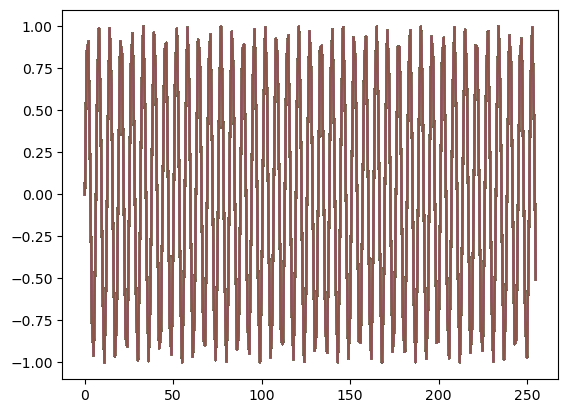

In [44]:
plt.plot(positionalencoding2d(4, 256, 256)[2, :, :])

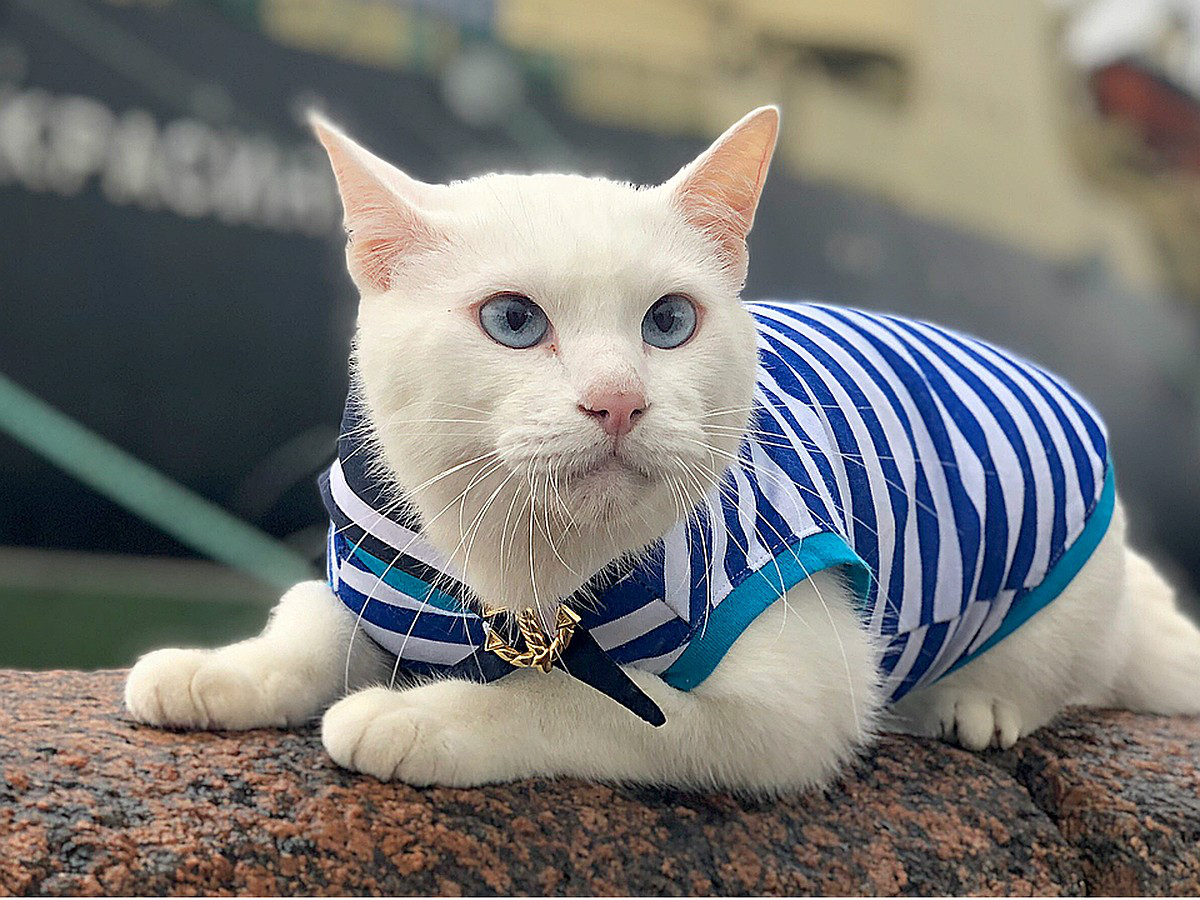

In [1]:
from PIL import Image
Image.open('cat.jpeg')

In [64]:
z = np.ones((5, 5))

In [55]:
x

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

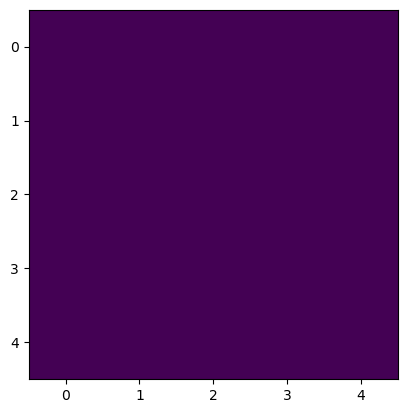

In [56]:
plt.imshow(x)

In [57]:
x[0][1] = 255

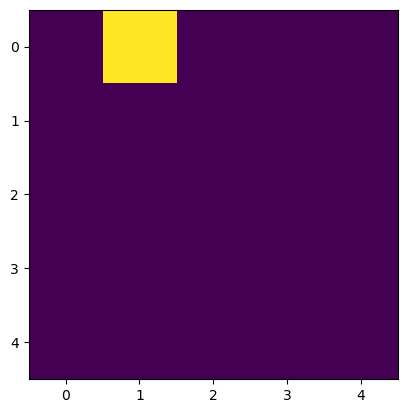

In [58]:
plt.imshow(x)

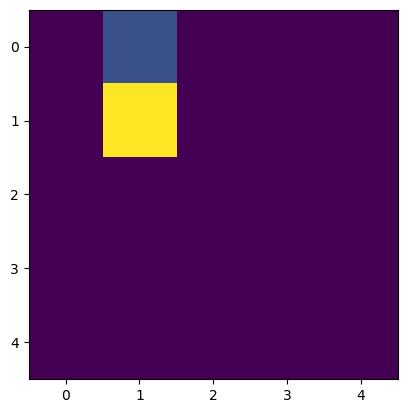

In [59]:
x[1][1]=1024
plt.imshow(x)

In [60]:
x[2][1] = -1024

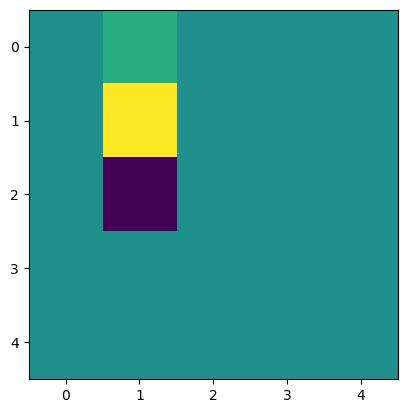

In [61]:
plt.imshow(x)

In [42]:
x = x - x.min()
x /= x.max()

In [47]:
z = Image.fromarray(x * 255).convert('L')

In [48]:
x

array([[0.50048828, 0.62451172, 0.50048828, 0.50048828, 0.50048828],
       [0.50048828, 1.        , 0.50048828, 0.50048828, 0.50048828],
       [0.50048828, 0.        , 0.50048828, 0.50048828, 0.50048828],
       [0.50048828, 0.50048828, 0.50048828, 0.50048828, 0.50048828],
       [0.50048828, 0.50048828, 0.50048828, 0.50048828, 0.50048828]])

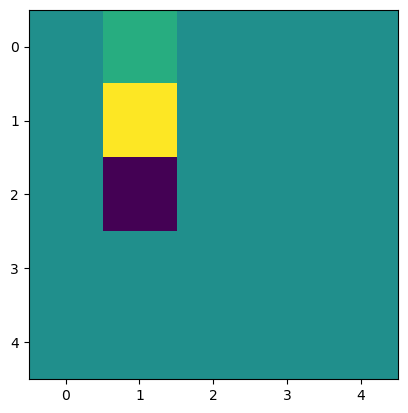

In [49]:
plt.imshow(z)

In [63]:
import networkx as nx

In [78]:
G.edges()

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)])

In [84]:
x[3][4] = -2333

In [85]:
colors = []
for i, j in G.edges():
    colors.append(x[i][j])

In [86]:
x.flatten().shape

(25,)

In [87]:
G = nx.from_numpy_array(z)

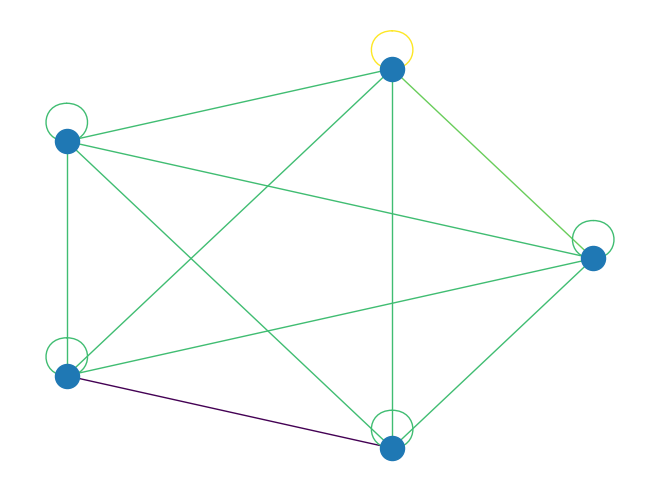

In [88]:
nx.draw_circular(G, edge_color = colors)

In [90]:
a = np.ones((2, 100))

In [99]:
a[0][0] = 0

In [101]:
a[..., 0]

array([0., 1.])

In [97]:
for iy, ix in np.ndindex(a.shape):
    print(iy, ix)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
